In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load Dataset

In [2]:
raw_ecommerce = pd.read_csv('C:/Users/dell/Documents/DSrakamin/Finpro/Dataset.csv')

In [3]:
raw_ecommerce.columns = raw_ecommerce.columns.str.lower()

# EDA

### Descriptive Statistics

In [5]:
raw_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           12835 non-null  float64
 1   administrative_duration  12313 non-null  float64
 2   informational            12946 non-null  int64  
 3   informational_duration   12946 non-null  float64
 4   productrelated           12946 non-null  int64  
 5   productrelated_duration  12307 non-null  float64
 6   bouncerates              12872 non-null  float64
 7   exitrates                12946 non-null  float64
 8   pagevalues               12946 non-null  float64
 9   specialday               12946 non-null  float64
 10  month                    12946 non-null  object 
 11  operatingsystems         12422 non-null  float64
 12  browser                  12946 non-null  int64  
 13  region                   12946 non-null  int64  
 14  traffictype           

In [22]:
raw_ecommerce.isna().sum()

administrative             111
administrative_duration    633
informational                0
informational_duration       0
productrelated               0
productrelated_duration    639
bouncerates                 74
exitrates                    0
pagevalues                   0
specialday                   0
month                        0
operatingsystems           524
browser                      0
region                       0
traffictype                  0
visitortype                  0
weekend                      0
revenue                      0
dtype: int64

In [7]:
raw_ecommerce.duplicated().sum()

711

terdapat **12946** baris data, dengan jumlah attribut 18. Dari 18 attribut, dideteksi ada 5 attribut yang memiliki nilai kosong. dan terdapat **711** data duplikat

In [4]:
cats = ['month','weekend','specialday','region','operatingsystems','browser','traffictype','visitortype','revenue']
nums = ['administrative','administrative_duration','informational','informational_duration',
        'productrelated','productrelated_duration',
        'bouncerates','exitrates','pagevalues']

In [9]:
raw_ecommerce.describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype
count,12835.000000,12313.000000,12946.000000,12946.000000,12946.000000,12307.000000,12872.000000,12946.000000,12946.000000,12946.000000,12422.000000,12946.000000,12946.000000,12946.000000
mean,2.303857,80.370267,0.498841,34.136048,31.657655,1192.740077,0.022309,0.043266,5.875963,0.061270,2.123169,2.360497,3.144369,4.078248
std,3.314427,175.494016,1.263276,140.022848,44.202635,1910.216261,0.048681,0.048808,18.414670,0.198667,0.906264,1.718878,2.402477,4.025467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.083333,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,599.583333,0.003112,0.025329,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.933333,0.000000,0.000000,38.000000,1470.522917,0.016933,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
raw_ecommerce[cats].astype(str).describe()

,month,weekend,specialday,region,operatingsystems,browser,traffictype,visitortype,revenue
count,12946,12946,12946,12946,12946,12946,12946,12946,12946
unique,10,2,6,9,9,13,20,3,2
top,May,False,0.0,1,2.0,2,2,Returning_Visitor,False
freq,3533,9929,11636,5031,6673,8360,4100,11072,10938


In [12]:
raw_ecommerce['revenue'].value_counts() / len(raw_ecommerce['revenue'])*100

revenue
False    84.489418
True     15.510582
Name: count, dtype: float64

### 1. Descriptive Statistics Insight

- A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
- B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 
---
A.

- tipe data kolom operating system dapat menggunakan tipe data int,\
- tipe data kolom month juga dapat menggunakan int. kolom lainnnya sudah sesuai.

B. 

Terdapat 12.946 baris data, dengan jumlah fitur 18. Dari 18 fitur tersebut, ada 5 fitur yang memiliki nilai null diantaranya:

1. Administrative `111` null data
2. Administrative_Duration `633` null data
3. ProductRelated_Duration `639` null data
4. BounceRates `74` null data
5. OperatingSystems `524` null data

Selain nilai null, juga terdapat 711 data *duplicated*

C. 
- Untuk fitur numerik (nums) terdapat outlier pada masing-masing fiturnya, dan sebaran nilai masing-masing fitur merupakan sebaran positively skewed, karena nilai mean yang lebih besar dari nilai median nya.

- Sedangkan untuk fitur kategorikal (cats), fitur revenue dipilih sebagai target. tetapi atribut ini memiliki imbalances, dimana nilai False/Not Buyer terdapat sebanyak 10.938 data, sehingga perlu untuk disesuaikan ketika proses training.

## Univariate Analysis

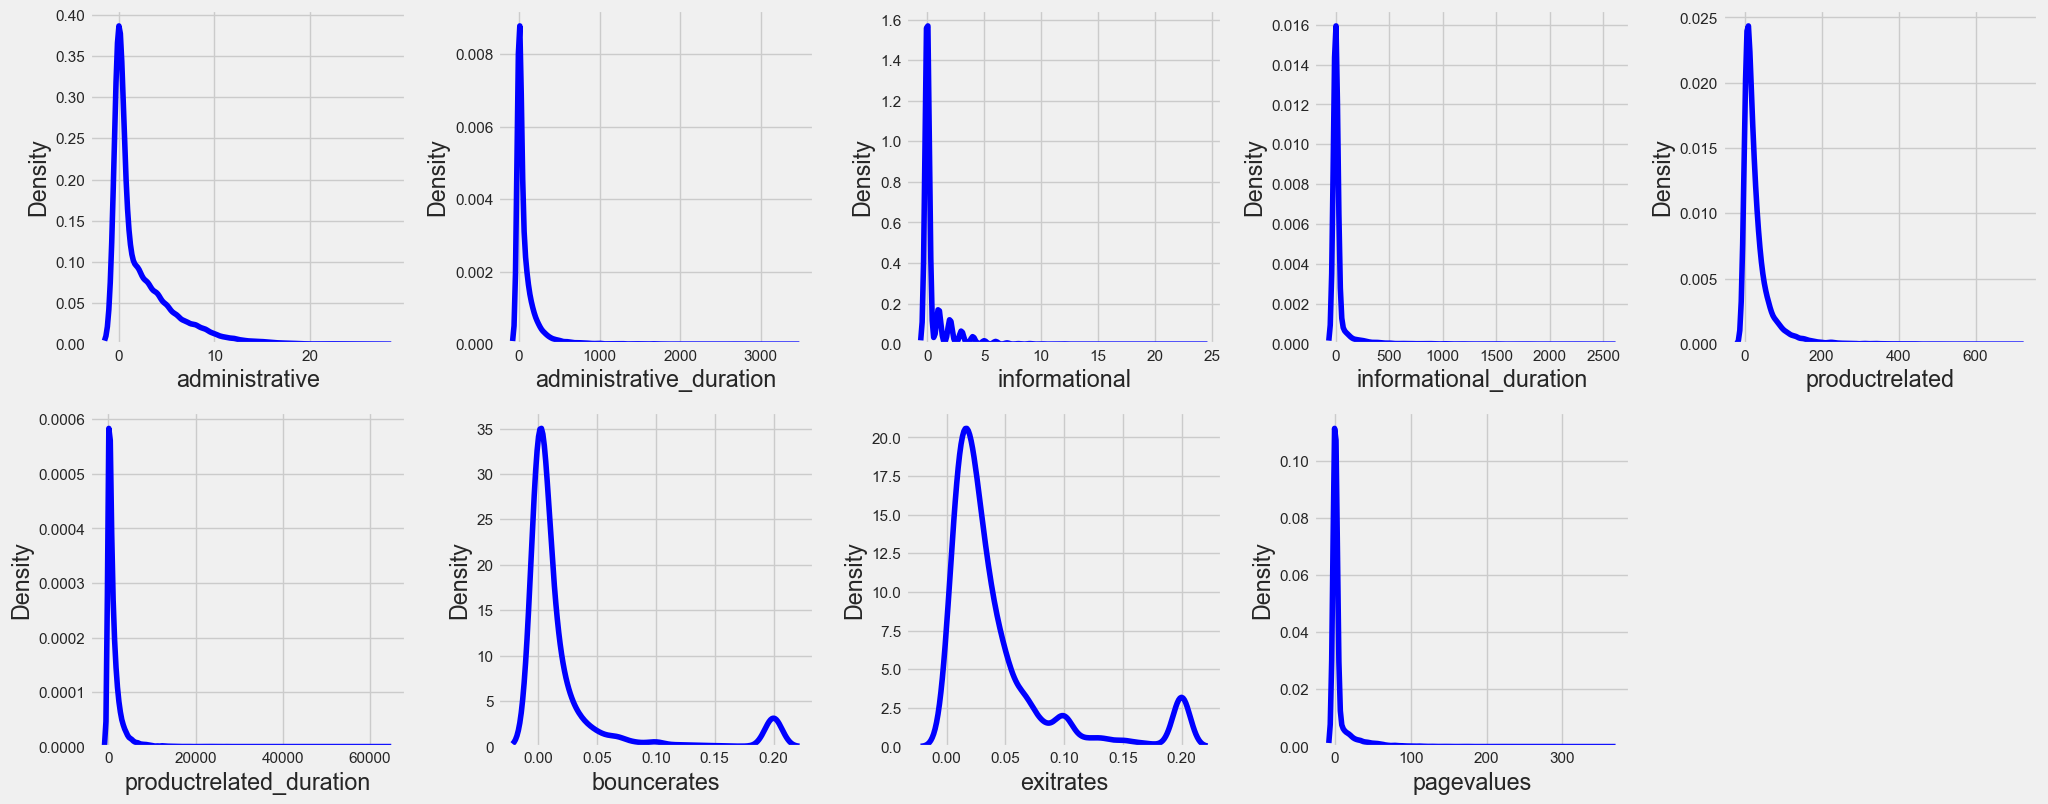

In [6]:
for i in range(0, len(nums)):
    plt.subplot(2,5, i+1)
    sns.kdeplot(x=raw_ecommerce[nums[i]], color='blue')
plt.tight_layout()

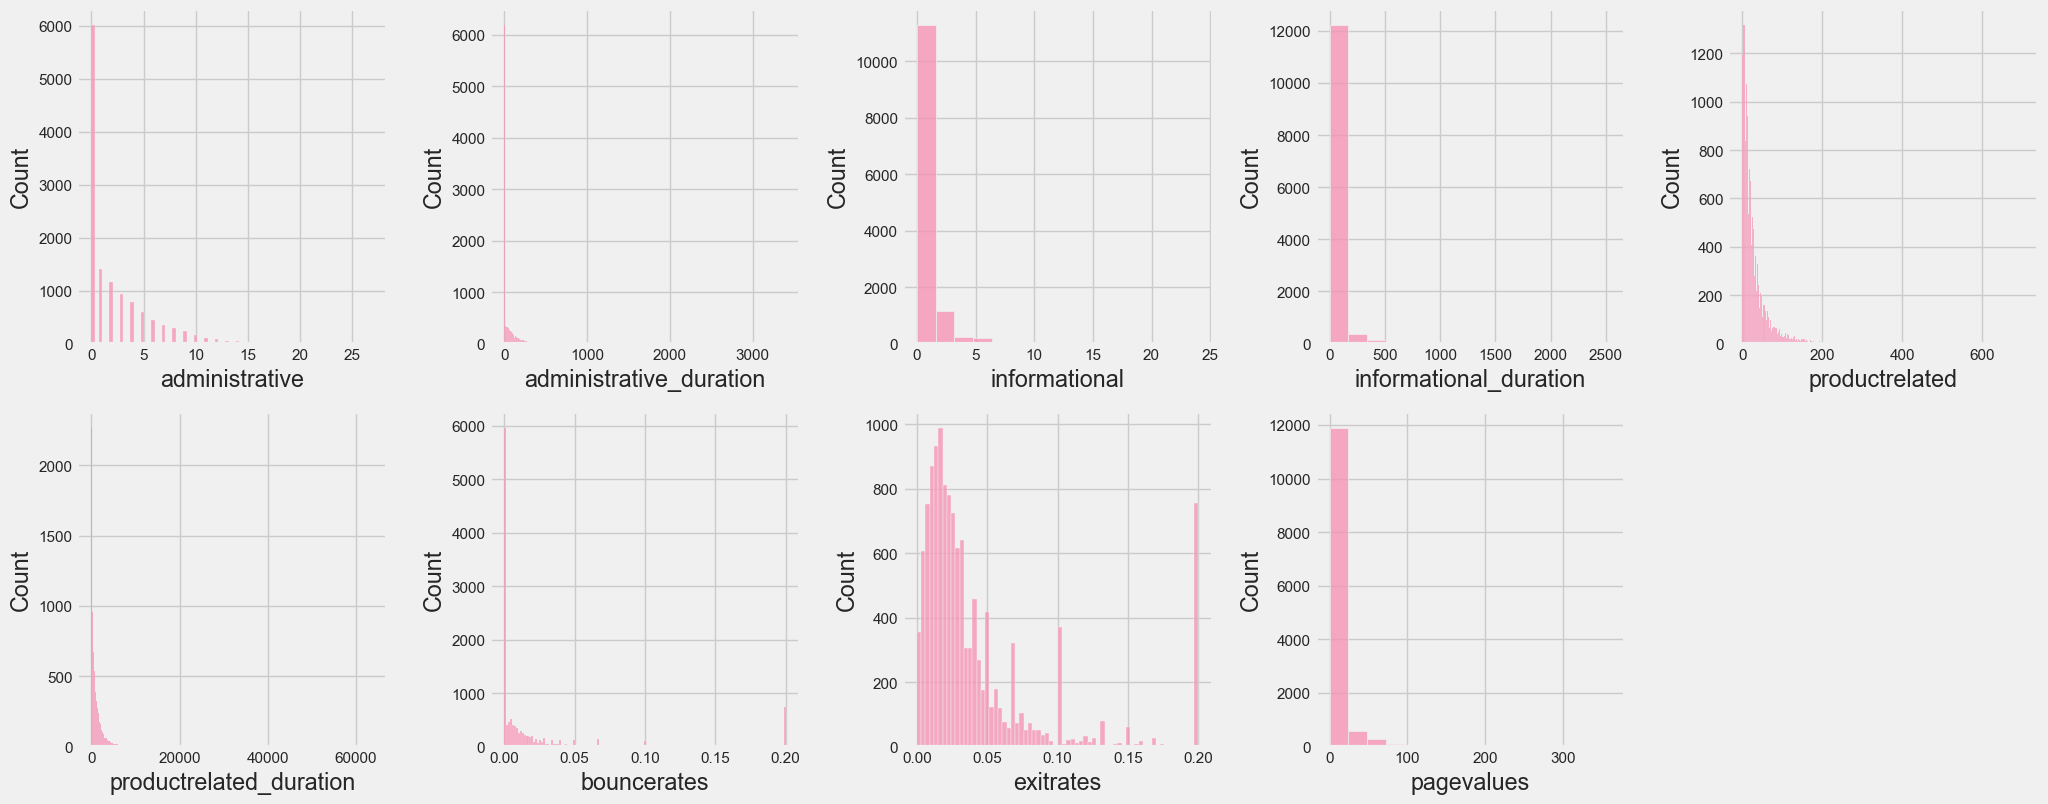

In [7]:
for i in range(0, len(nums)):
    plt.subplot(2,5, i+1)
    sns.histplot(x=raw_ecommerce[nums[i]], color='#f78fb3')
plt.tight_layout()

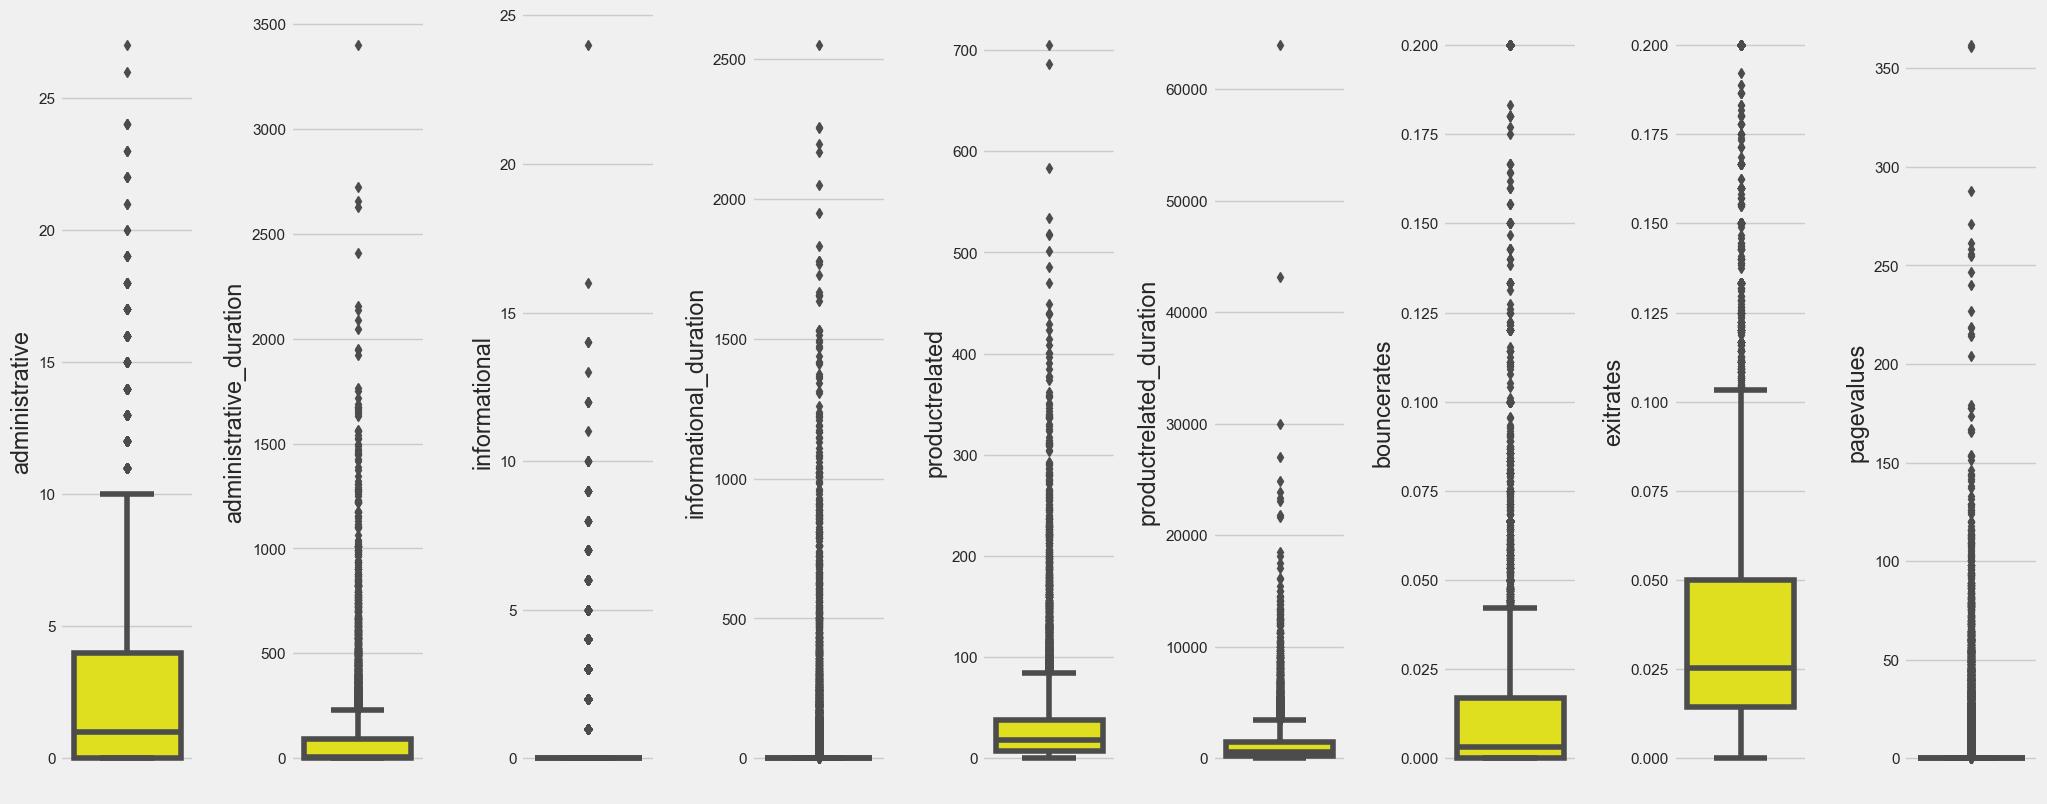

In [13]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(data=raw_ecommerce, y=nums[i], color='yellow')
plt.tight_layout()

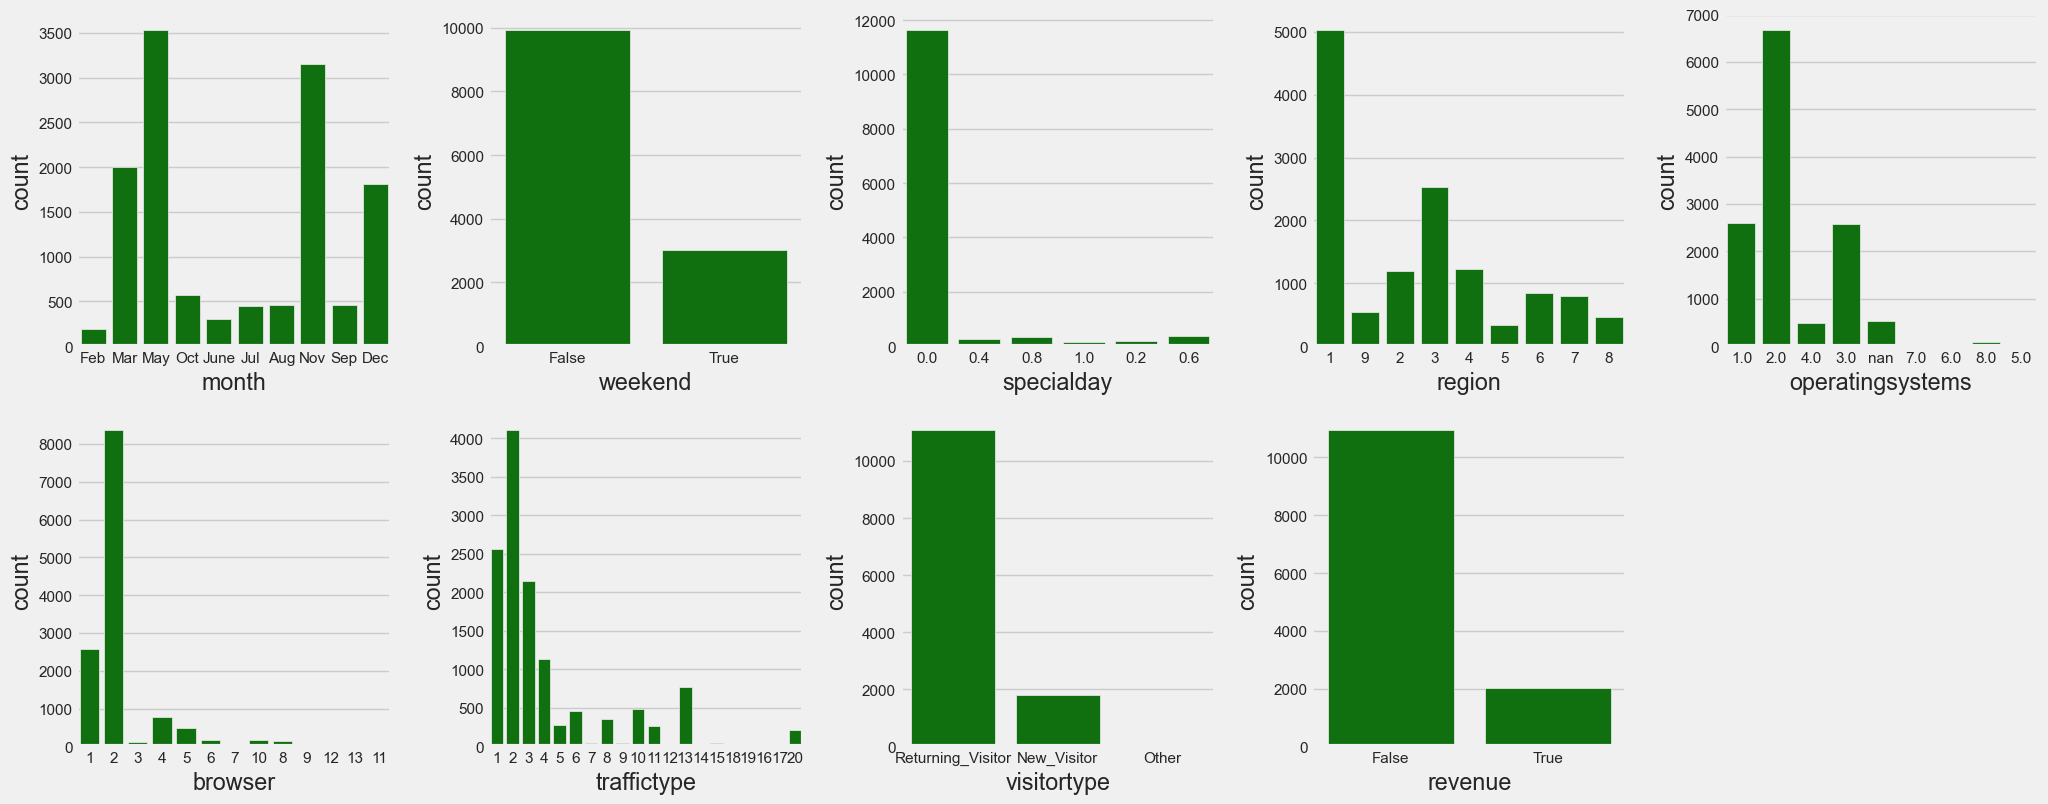

In [14]:
for i in range(0, len(cats)):
    plt.subplot(2,5, i+1)
    sns.countplot(x=raw_ecommerce[cats[i]], color='green')
plt.tight_layout()

### 2. Univariate Analysis Insight
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

---
untuk kolom numerikal berikut ini memiliki distribusi positively skewed dan juga memiliki outlier:
- 'administrative'
- 'administrative_duration'
- 'informational'
- 'informational_duration'
- 'productrelated'
- 'productrelated_duration'
- 'bouncerates'
- 'exitrates'
- 'pagevalues'

Untuk tahap preprocessing dapat dilakukan, handling outlier dan feature transformation.

Untuk kolom kategorikal :
- 'month' : jumlah data didominasi bulan: May, Nov, Mar, Dec
- 'weekend' : didominasi oleh nilai 'False'
- 'specialday' : kunjungan situs mayoritas dilakukan saat, jauh dari specialday (hari khusus)
- 'region' : observasi menunjukan user region 1 mendominasi
- 'operatingsystem' : yang digunakan banyak user 2, 1, 3, 4
- 'browser' : jenis 2 mendominasi data dari 13 jenis browser
- 'traffictype' : jenis traffic yang paling banyak membawa user merupakan traffic 2, 1, 3
- 'visitortype' : kunjungan mayoritas dilakukan oleh returning_visitor
- 'revenue' : sebanyak 84.48% dari kunjungan tidak melakakukan pembelian / tidak menghasilkan pendapatan

Untuk kolom revenue sebagai target perlu dilakukan imbalances handling\
kolom visitortype dan month, dapat dilakukan feature encoding agar dapat dilakukan algoritma korelasi\

## Multivariate Analysis

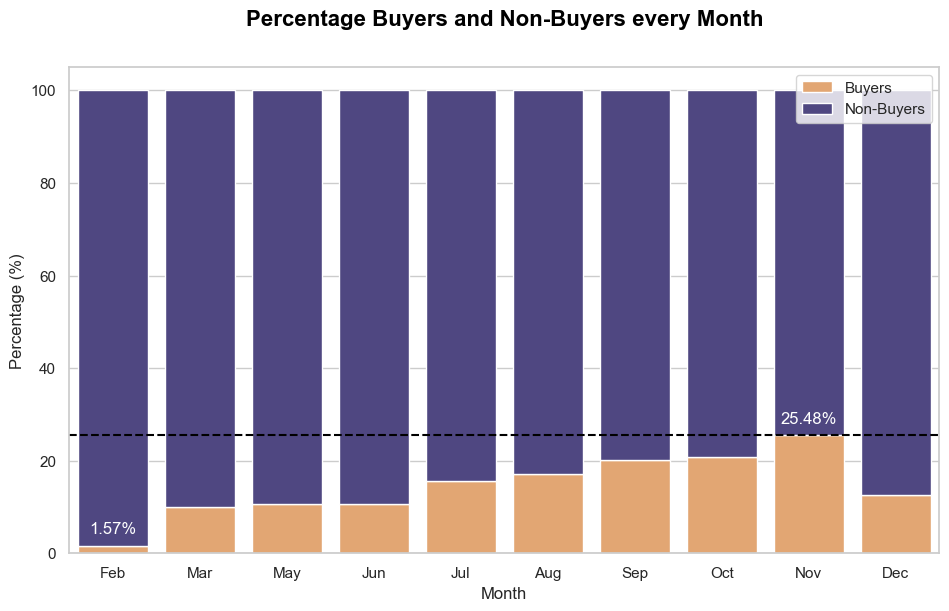

In [66]:
# groupby month
month_revenue       = raw_ecommerce.groupby(['month', 'revenue'])['revenue'].count().reset_index(name='count')

# ubah ke pivot
df_pivot = month_revenue.pivot_table(index='month', columns='revenue', values='count')
df_pivot = df_pivot.reset_index()
df_pivot.columns = ['month', 'non buyer', 'buyer']

# sorted bulan agar berurutan
df_pivot.loc[df_pivot['month'] == 'June', 'month'] = 'Jun'
month_order = ['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_pivot['month'] = pd.Categorical(df_pivot['month'], categories=month_order, ordered=True)
df_pivot_sorted = df_pivot.sort_values(by='month')

# ubah month menjadi index
df_pivot_sorted.set_index('month', inplace=True)

# Menghitung total untuk setiap bulan
df_pivot_sorted['total'] = df_pivot_sorted['non buyer'] + df_pivot_sorted['buyer']

# Menghitung persentase untuk setiap kategori (False dan True)
df_pivot_sorted['non buyer_percent'] = (df_pivot_sorted['non buyer'] / df_pivot_sorted['total']) * 100
df_pivot_sorted['buyer_percent'] = (df_pivot_sorted['buyer'] / df_pivot_sorted['total']) * 100

# Menggambar stacked bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=df_pivot_sorted.index, y=df_pivot_sorted['buyer_percent'], color='SandyBrown', label='Buyers')
sns.barplot(x=df_pivot_sorted.index, y=df_pivot_sorted['non buyer_percent'], bottom=df_pivot_sorted['buyer_percent'], color='DarkSlateBlue', label='Non-Buyers')

plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.title('Percentage Buyers and Non-Buyers every Month', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)

#adding horizontal line
plt.axhline(y=df_pivot_sorted.loc['Nov','buyer_percent'],color='Black',ls='--')

#adding text
plt.text(8, df_pivot_sorted.loc['Nov', 'buyer_percent'] + 2, '25.48%', ha='center', va='bottom', color='White')
plt.text(0, df_pivot_sorted.loc['Feb', 'buyer_percent'] + 2, '1.57%', ha='center', va='bottom', color='White')

plt.legend()

plt.show()

In [154]:
df_pivot

,month,non buyer,buyer
0,Aug,382,79
1,Dec,1588,228
2,Feb,188,3
3,Jul,381,70
4,Jun,275,33
5,Mar,1796,201
6,May,3154,379
7,Nov,2348,803
8,Oct,455,119
9,Sep,371,93


Kunjungan user pada platform, yang menghasilkan revenue didominasi pada bulan **November** `25,48% Revenue Rate`, Sementara bulan **Februari** memiliki kunjungan yang menghasilkan revenue yang paling sedikit `1.57% Revenue Rate` (3 buyer). 

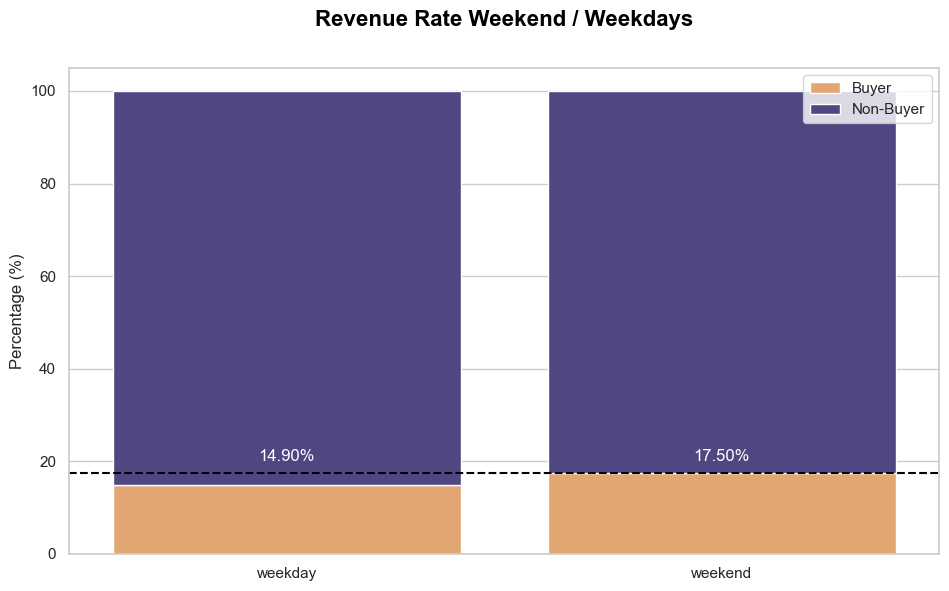

In [129]:
import matplotlib.pyplot as plt
from matplotlib import cm

weekend_revenue = raw_ecommerce.groupby(['weekend', 'revenue'])['revenue'].count().reset_index(name='count')
weekend_revenue['weekend'] = weekend_revenue['weekend'].map({False: 'weekday', True: 'weekend'})
weekend_revenue['revenue'] = weekend_revenue['revenue'].map({False: 'Non-Buyer', True: 'Buyer'})

# creating pivot table
weekend_revenue_pivot = weekend_revenue.pivot_table(index='weekend', columns='revenue', values='count')

#changing names
weekend_revenue_pivot.columns = ['Buyers','Non-Buyers']

# adding column total customer
weekend_revenue_pivot['total'] = weekend_revenue_pivot.sum(axis=1)

# Calculate revenue rate for weekends and weekdays
weekend_revenue_pivot['buyer_pct'] = weekend_revenue_pivot['Buyers'] / weekend_revenue_pivot['total'] * 100
                                                                         
weekend_revenue_pivot['non_buyer_pct'] = weekend_revenue_pivot['Non-Buyers'] /  weekend_revenue_pivot['total'] * 100

# Creating stacked bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=weekend_revenue_pivot.index, y=weekend_revenue_pivot['buyer_pct'], color='SandyBrown', label='Buyer')
sns.barplot(x=weekend_revenue_pivot.index, y=weekend_revenue_pivot['non_buyer_pct'], bottom=weekend_revenue_pivot['buyer_pct'],\
            color='DarkSlateBlue', label='Non-Buyer')

plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Revenue Rate Weekend / Weekdays', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)

#adding horizontal line
plt.axhline(y=weekend_revenue_pivot.loc['weekend','buyer_pct'],color='Black',ls='--')

#adding text
#adding text
plt.text(1, weekend_revenue_pivot.loc['weekend','buyer_pct'] + 2, '17.50%', ha='center', va='bottom', color='White')
plt.text(0, weekend_revenue_pivot.loc['weekend','buyer_pct'] + 2, '14.90%', ha='center', va='bottom', color='White')

plt.legend()

plt.show()

In [123]:
weekend_revenue_pivot

,Buyers,Non-Buyers,total,buyer_pct,non_buyer_pct
weekend,,,,,
weekday,1480,8449,9929,14.905831,85.094169
weekend,528,2489,3017,17.500829,82.499171


Kunjungan user pada weekday lebih tinggi dari weekend tetapi revenue rate weekend > weekday `17.5% /14.9%`

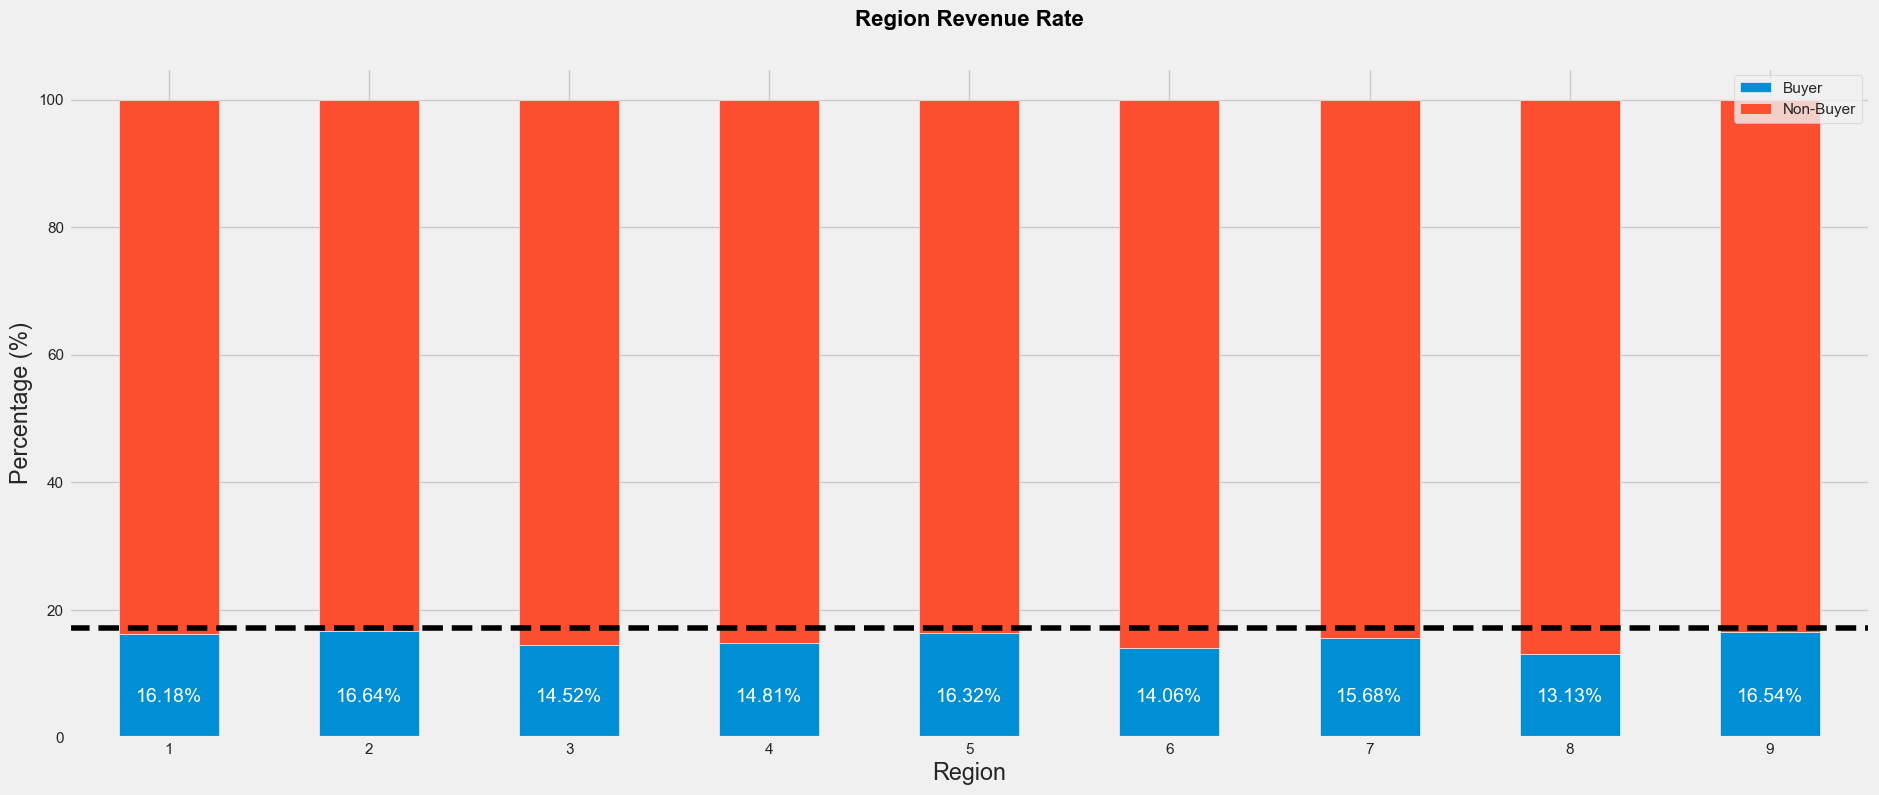

In [5]:

region_revenue    = raw_ecommerce.groupby(['region','revenue'])['revenue'].count().reset_index(name='count')
reg_pivot         = region_revenue.pivot_table(index='region',columns='revenue', values='count')
reg_pivot.columns = ['Non-Buyer','Buyer']

#calculate revenue rate by region
reg_pivot_pct = reg_pivot.div(reg_pivot.sum(axis=1), axis=0) * 100
reg_pivot_pct = reg_pivot_pct[['Buyer','Non-Buyer']]

# plotting
reg_pivot_pct.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.title('Region Revenue Rate', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)
plt.xticks(rotation=0)

# Add legend
plt.legend()

# add horizontal line
plt.axhline(y=reg_pivot_pct.loc[2,'Buyer'] +.5,color='Black',ls='--')

# Add percentages on top of each bar
for index, value in enumerate(reg_pivot_pct['Buyer']):
    plt.text(index, 5, s=f'{round(value,2)}%', ha='center', va='bottom', color='White')


# Display the chart
plt.show()

In [19]:
reg_pivot.sum(axis=1)

region
1    5031
2    1190
3    2528
4    1229
5     337
6     839
7     797
8     457
9     538
dtype: int64

Region 1 memiliki pengunjung paling banyak diantara region lainnya. akan tetapi revenue rate region 2 (16.64%) menjadi paling tinggi diantara region lainnya.

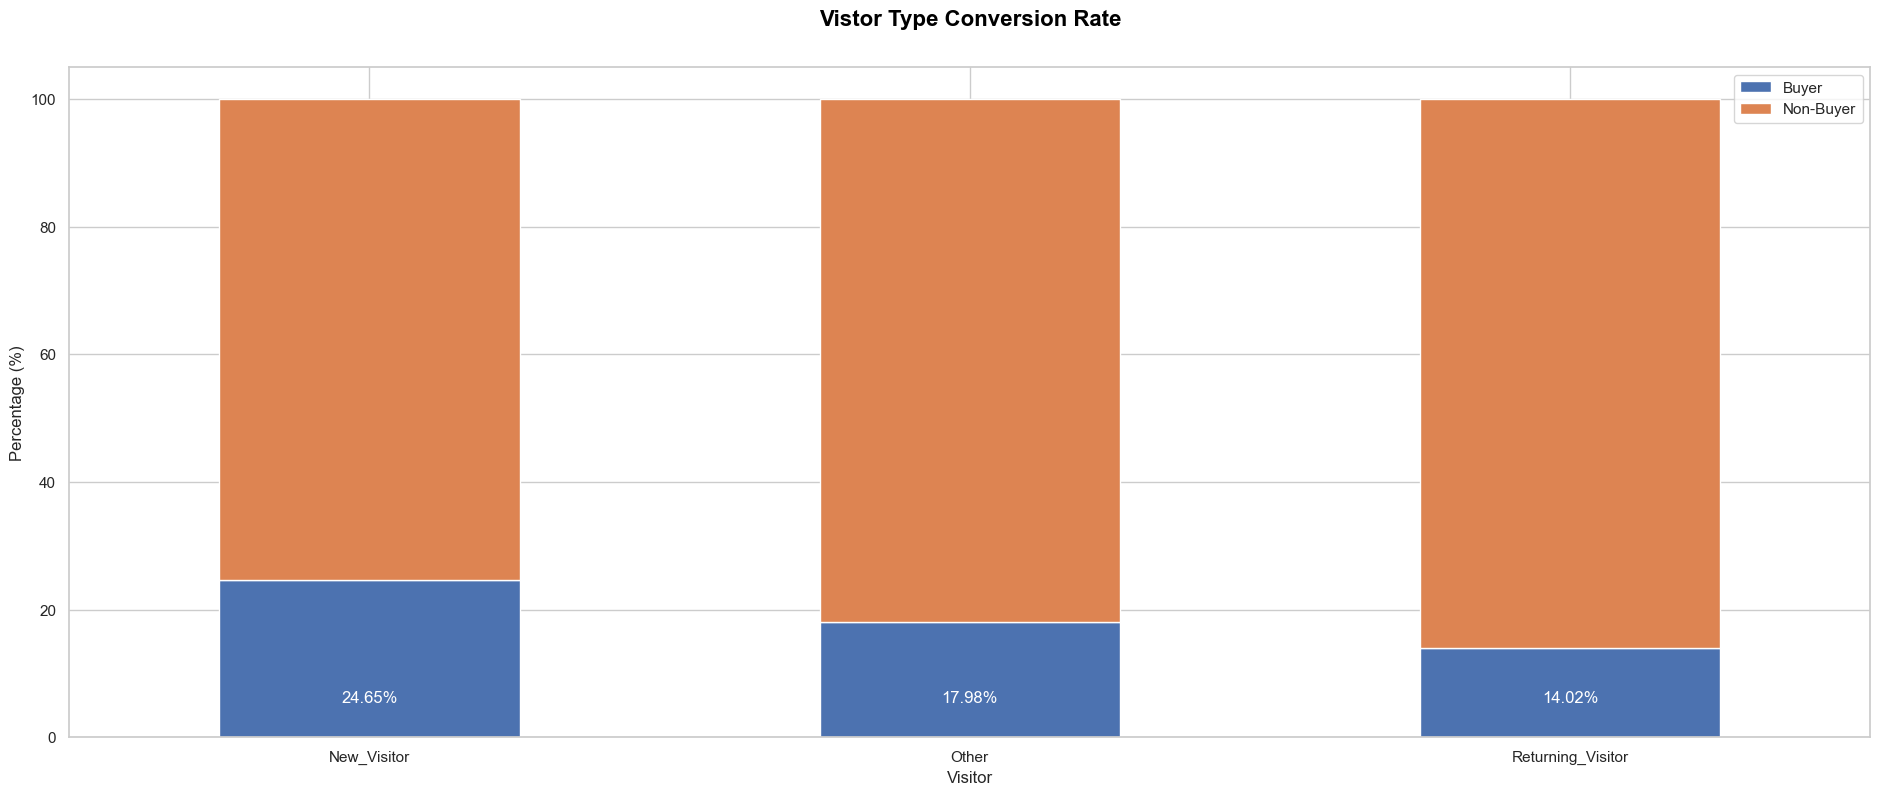

In [270]:
#Group df
visitor_df            = raw_ecommerce.groupby(['visitortype', 'revenue'])\
                        ['revenue'].count().reset_index(name='cnt').sort_values(by='cnt',ascending=False)
visitor_pivot         = visitor_df.pivot_table(index='visitortype',columns='revenue', values='cnt')
visitor_pivot.columns = ['Non-Buyer','Buyer']
visitor_pivot         = visitor_pivot[['Buyer','Non-Buyer']]
visitor_rev_pct       = visitor_pivot.div(visitor_pivot.sum(axis=1), axis=0)*100

#Plot
visitor_rev_pct.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Visitor')
plt.ylabel('Percentage (%)')
plt.title('Vistor Type Conversion Rate', color='black', fontsize=16, loc='center', weight='bold', pad = 30,)
plt.xticks(rotation=0)

# Add legend
plt.legend()


#Add percentages on top of each bar
for index, value in enumerate(visitor_rev_pct['Buyer']):
    plt.text(index, 5, s=f'{round(value,2)}%', ha='center', va='bottom', color='White')


# Display the chart
plt.show()

In [271]:
visitor_rev_pct

,Buyer,Non-Buyer
visitortype,,
New_Visitor,24.649860,75.350140
Other,17.977528,82.022472
Returning_Visitor,14.017341,85.982659


Sesi dilakukan mayoritas oleh Returning Visitors. namun, persentase Buyer pada Returning Visitors secara signifikan lebih sedikit dari Non-Buyers. pada New visitor, proporsi Buyers mendekati proporsi Non-Buyers. hal ini menunjukan bahwa

Returning Visitor lebih banyak sesi kunjungannya, tetapi New Visitors mempunyai purchase rate yang lebih tinggi `24.65%`.

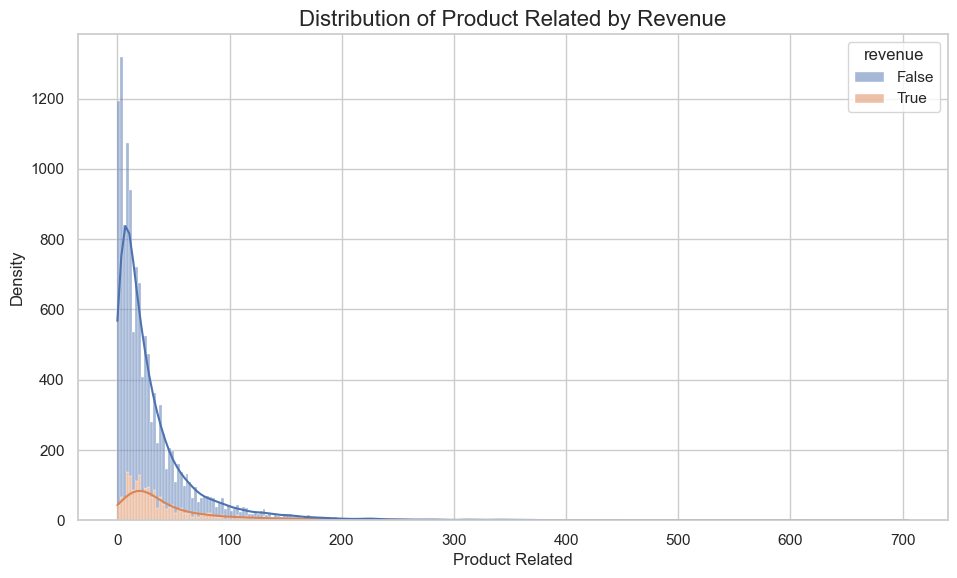

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for 'productrelated'
plt.figure(figsize=(10, 6))
sns.histplot(data=raw_ecommerce, x='productrelated', hue='revenue', kde=True, multiple='stack')

plt.xlabel('Product Related')
plt.ylabel('Density')
plt.title('Distribution of Product Related by Revenue', fontsize=16)

#plt.legend(title='Revenue')

plt.show()

In [32]:
#grouping df based on revenue and agregating page type mean
page_cnt = raw_ecommerce.groupby(['revenue'])[['administrative','informational','productrelated']].mean().reset_index()

#change revenue column value
page_cnt.loc[page_cnt['revenue']==True, 'revenue'] = 'Buyer'
page_cnt.loc[page_cnt['revenue']==False, 'revenue'] = 'Non-Buyer'
page_cnt =  page_cnt[['revenue','productrelated','administrative','informational']]

page_cnt

,revenue,productrelated,administrative,informational
0,Non-Buyer,28.676632,2.103486,0.447065
1,Buyer,47.895916,3.393879,0.780876


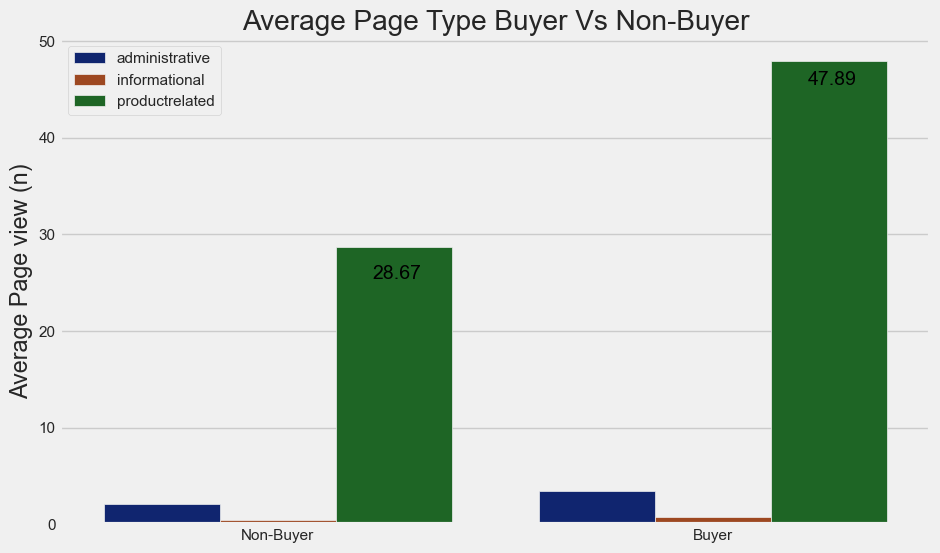

In [103]:
#creating melted df for visualization
melted_pagetype = page_cnt.melt(id_vars='revenue', value_vars=['administrative','informational','productrelated'],\
                            var_name='PageType', value_name='Value')

#plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_pagetype, x='revenue', y='Value', hue='PageType', palette='dark')
plt.xlabel('')
plt.ylabel('Average Page view (n)')
plt.legend(loc='upper left')
plt.title('Average Page Type Buyer Vs Non-Buyer') 

#adding text
plt.text(0+.33, 25, '28.67', ha='right', va='bottom', color='Black')
plt.text(1+.33, 45, '47.89', ha='right', va='bottom', color='Black')
plt.show()

In [38]:
melted_pagetype

,revenue,PageType,Value
0,Non-Buyer,administrative,2.103486
1,Buyer,administrative,3.393879
2,Non-Buyer,informational,0.447065
3,Buyer,informational,0.780876
4,Non-Buyer,productrelated,28.676632
5,Buyer,productrelated,47.895916


Barplot menunjukan bahwa pengunjung yang memutuskan untuk melakukan pembelian **Buyer**, memiliki nilai rata-rata yang lebih tinggi dari **Non-Buyer**. dalam melihat halaman productrelated 

In [85]:
pg_val_rev_true = raw_ecommerce[(raw_ecommerce['pagevalues'] >0) & (raw_ecommerce['revenue'] == True)]['revenue'].count()
pg_nonval_rev_true = raw_ecommerce[(raw_ecommerce['pagevalues'] == 0) & (raw_ecommerce['revenue'] == True)]['revenue'].count()
pg_val_rev_false = raw_ecommerce[(raw_ecommerce['pagevalues'] >0) & (raw_ecommerce['revenue'] == False)]['revenue'].count()
pg_nonval_rev_false = raw_ecommerce[(raw_ecommerce['pagevalues'] == 0) & (raw_ecommerce['revenue'] == False)]['revenue'].count()

# Creating dictionary
pg_rev_data = {
    'Session count of page value = 0': [pg_nonval_rev_true, pg_nonval_rev_false],
    'Session count of page value > 0': [pg_val_rev_true, pg_val_rev_false]}

# Creating the DataFrame
pg_rev = pd.DataFrame(pg_rev_data, index=['Buyer', 'Non-Buyer'])
pg_rev

,Session count of page value = 0,Session count of page value > 0
Buyer,392,1616
Non-Buyer,9691,1247


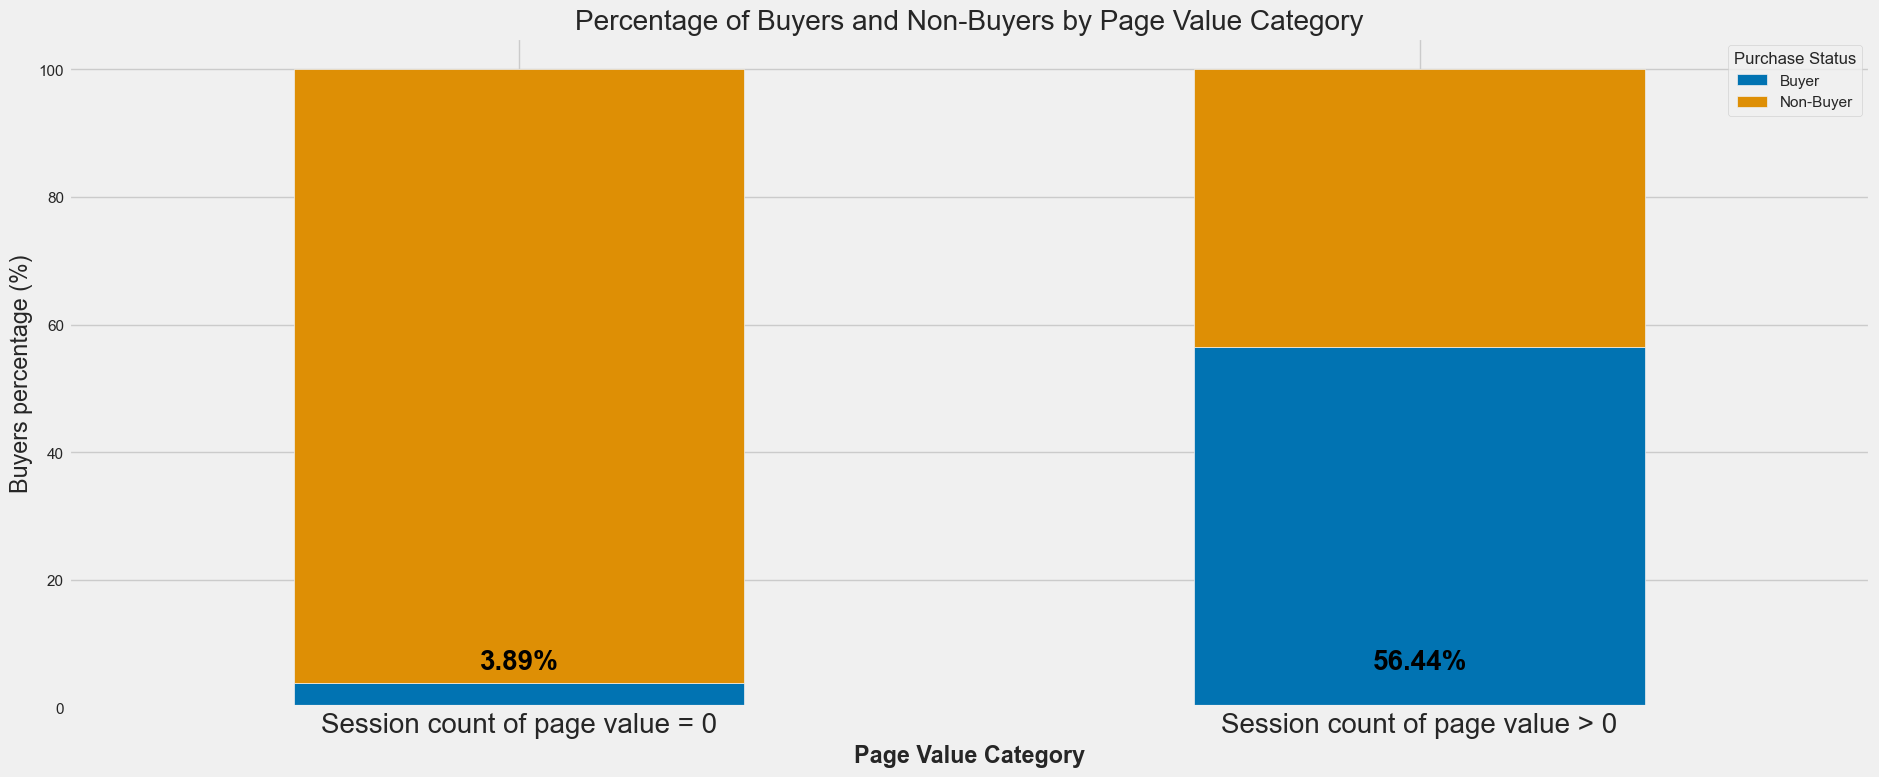

In [92]:
# Calculate the percentages across the columns
pg_rev_percent = (pg_rev.div(pg_rev.sum(axis=0), axis=1) * 100).T

# Plotting
colors = sns.color_palette('colorblind')[0:2]
pg_rev_percent.plot(kind='bar', stacked=True,color=colors)

# Adjusting the legend to the upper right
plt.legend(title='Purchase Status', loc='upper right')

# Rotating x-axis labels to horizontal
plt.xticks(rotation=0)

# Adding labels and title
plt.xlabel('Page Value Category',fontweight='bold')
plt.ylabel('Buyers percentage (%)')
plt.title('Percentage of Buyers and Non-Buyers by Page Value Category')
plt.xticks(fontsize=20)

#adding percentage
for index, value in enumerate(pg_rev_percent['Buyer']):
    plt.text(index, 5, s=f'{round(value,2)}%', ha='center', va='bottom', color='Black',fontsize=20, fontweight='bold')

# Show the plot
plt.show()

In [87]:
pg_rev_percent

,Buyer,Non-Buyer
Session count of page value = 0,3.887732,96.112268
Session count of page value > 0,56.444289,43.555711


Dalam pembelian ketika session melibatkan pagevalues > 0 purchase rate tinggi `56.44%`. Sebaliknya, sesi dengan pagevalues nol menunjukkan purchase rate yang lebih rendah `3.88%`. 

In [8]:
kor = nums +['weekend', 'specialday', 'region', 'operatingsystems', 'browser', 'traffictype', 'revenue']

<Axes: >

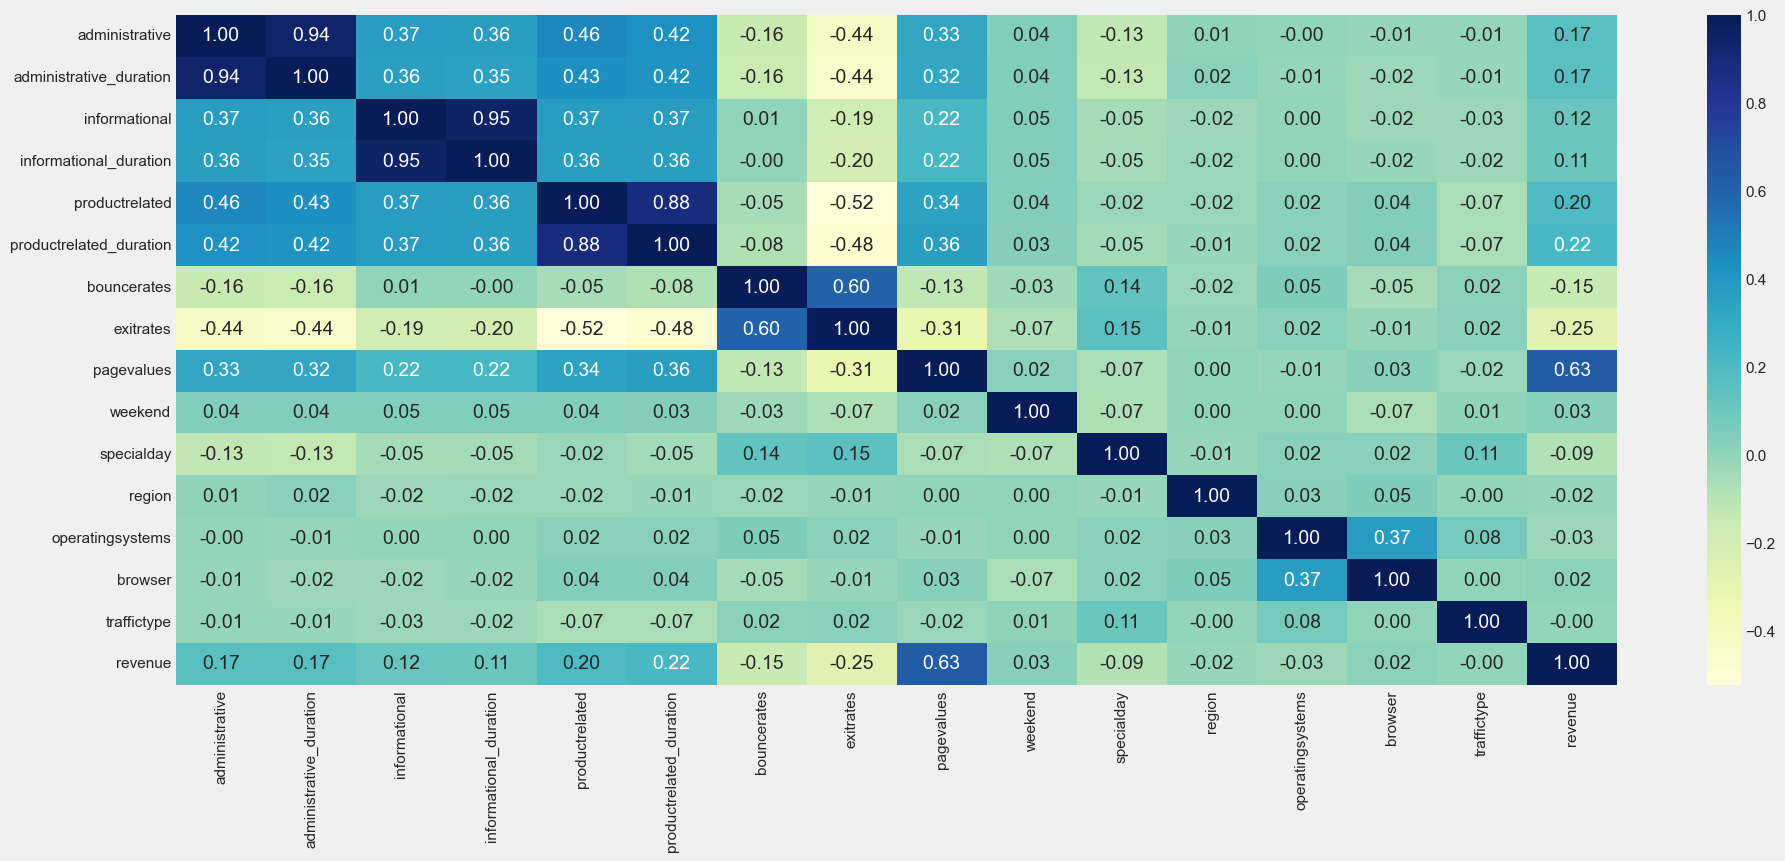

In [57]:
#spearman correlation method
sns.heatmap(raw_ecommerce[kor].corr(method='spearman'), cmap='YlGnBu',annot=True,fmt='.2f')

<Axes: >

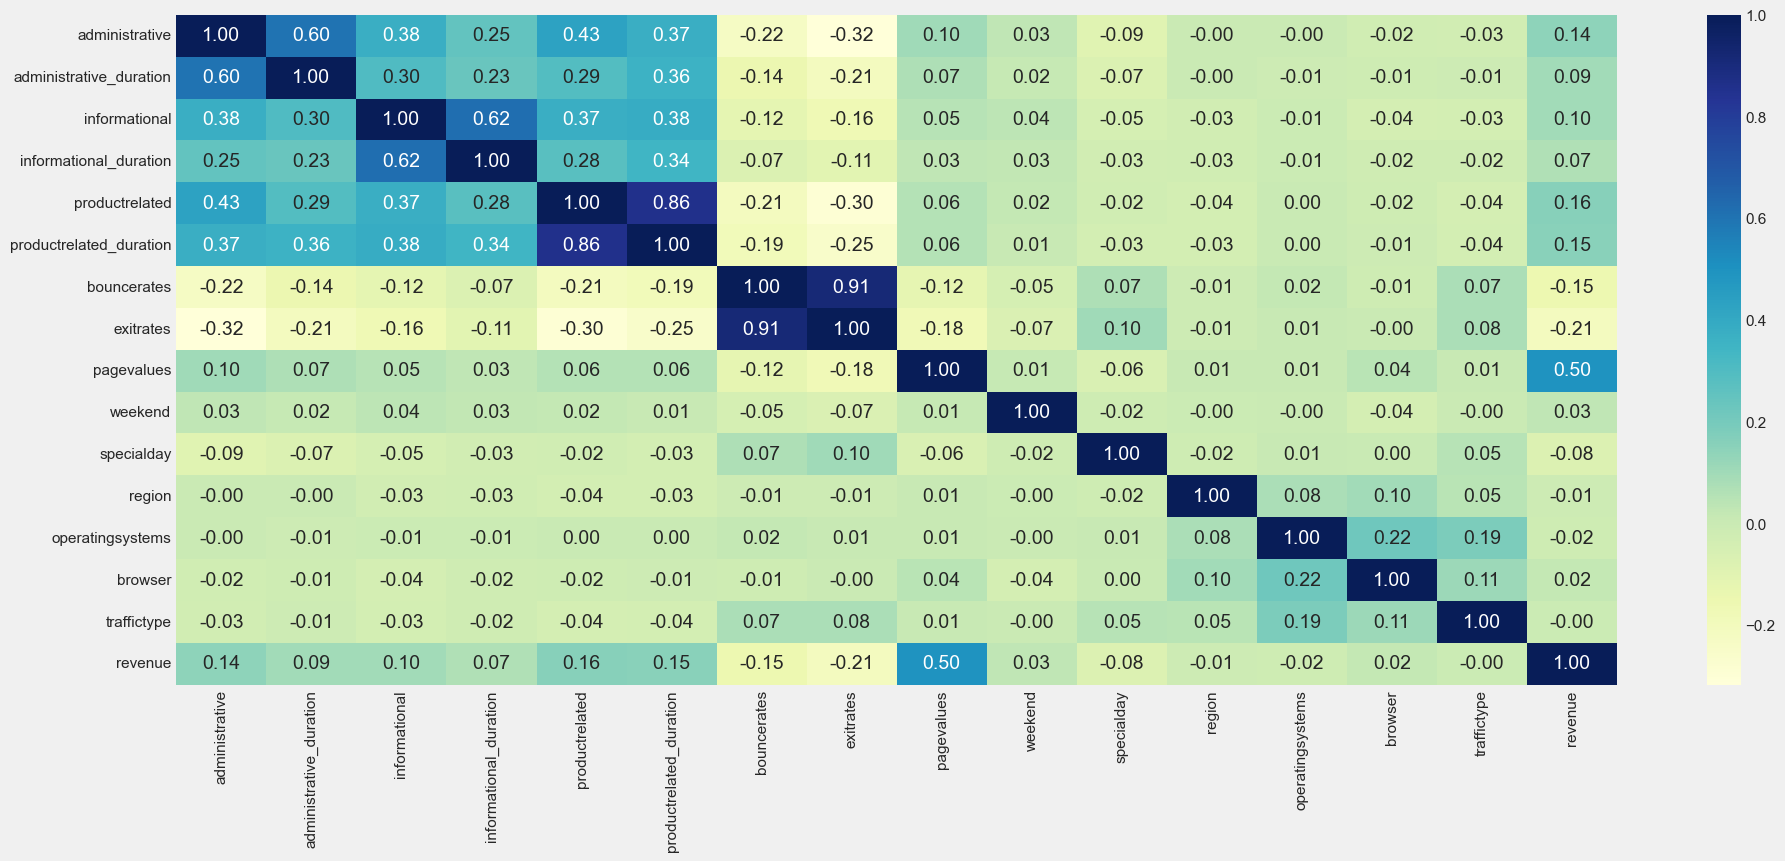

In [9]:
#pearson correlation method
sns.heatmap(raw_ecommerce[kor].corr(), cmap='YlGnBu',annot=True,fmt='.2f')

### 3. Multivariate Analysis Insight

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
- A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
- B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

---
#### 3A.
fitur :
- productrelated_duration
- administrative
- exitrates
- pagevalues

memiliki korelasi dengan target

`pagevalues` menjadi fitur yang memiliki korelasi sangat relevan dengan target (0.63)


#### 3B.
berdasarkan hasil korelasi heatmap yang ditampilkan, terdapat korelasi yang tinggi antara fitur :<br>
- productrelated dengan productrelated_duration (0.88)
- administrative dengan administrative_duration (0.94)
- informational dengan informational_duration   (0.95)
- bounce_rates dengan exitrates                 (0.60)
- operatingsystem dengan browser                (0.37)
<br>

maka antara salah satu fitur yang berkorelasi tinggi, akan di drop berdasarkan korelasi yang rendah terhadap target **revenue**.

fitur **pagevalues** memiliki korelasi yang tinggi/*relevan* terhadap target. sebesar (0.63)

ada kemungkinan fitur month dan visitortype berkorelasi tinggi terhadap target, maka perlu encoding untuk tahap preprocessing dan melihat korelasinya

### 4. Business Insight & Reccomendation



**Insight**

- Region 1 memiliki pengunjung paling banyak diantara region lainnya. akan tetapi revenue rate region 2 `16.64%` menjadi paling tinggi diantara region lainnya.

- Kunjungan user pada platform, yang menghasilkan revenue didominasi pada bulan November `25,48%` Revenue Rate, Sementara bulan Februari memiliki kunjungan yang menghasilkan revenue yang paling sedikit `1.57%` Revenue Rate (3 buyer).

- Bulan May memiliki kunjungan yang paling banyak diantara yang lain terdapat total kunjungan 3533 akan tetapi, hanya 379 dari total kunjungan yang menghasilkan revenue.

- Kunjungan user pada weekday lebih tinggi dari weekend tetapi revenue rate weekend > weekday `17.5% /14.9%`

- Sesi dilakukan mayoritas oleh Returning Visitors. namun, persentase Buyer pada Returning Visitors secara signifikan lebih sedikit dari Non-Buyers. pada New visitor, proporsi Buyers mendekati proporsi Non-Buyers. hal ini menunjukan bahwa Returning Visitor lebih banyak sesi kunjungannya, tetapi New Visitors mempunyai purchase rate yang lebih tinggi `24.65%`.

- Pengunjung yang memutuskan untuk melakukan pembelian **Buyer**, memiliki nilai rata-rata yang lebih tinggi dari **Non-Buyer**. dalam melihat halaman productrelated `47.89 / 28.67` .

- ketika session melibatkan pagevalues > 0 purchase rate tinggi `56.44%`. Sebaliknya, sesi dengan pagevalues nol menunjukkan purchase rate yang lebih rendah `3.88%`.
---

**Business Recommendation**

- untuk region yang masih rendah nilai revenue_rate nya, tim marketing dapat menampilkan halaman web yang memiliki pagavalues > 0, dan juga menampilkan rekomendasi yang relevan dengan halaman web yang yang dikunjungi user (product related). strategi marketing tersebut dapat dilakukan pada weekend, dikarenakan disaat weekend revenue_rate lebih tinggi dibandingkan weekday. maka hal ini dapat membantu meningkatkan revenue platform e-commerce.

---

**Metrics**

- Revenue

# Data Preprocessing

In [53]:
clean_data = raw_ecommerce.copy()

### Handle Missing Value

In [54]:
# define function to detect missing value
def info_missing_value(data):
    total   = data.isna().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)
    
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data


info_missing_value(clean_data)

,Total,Percent
productrelated_duration,639,4.935888
administrative_duration,633,4.889541
operatingsystems,524,4.047582
administrative,111,0.857408
bouncerates,74,0.571605


In [55]:
null_feature = ['productrelated_duration', 'administrative_duration', 'operatingsystems', 'administrative', 'bouncerates']

clean_data[null_feature] = clean_data[null_feature].fillna(clean_data[null_feature].median())

In [56]:
# remove missing value
clean_data.dropna(inplace=True)

info_missing_value(clean_data)

,Total,Percent


### Adjusting data types

In [8]:
# month June are wrongly abreviated
clean_data['month'].value_counts()

month
May     3025
Nov     2656
Mar     1725
Dec     1578
Oct      494
Sep      407
Aug      397
Jul      391
June     250
Feb      159
Name: count, dtype: int64

In [9]:
clean_data.loc[clean_data['month']=='June', 'month'] = 'Jun'

In [10]:
# ordering month
month_order = ['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

clean_data['month'] = pd.Categorical(clean_data['month'], categories=month_order, ordered=True)

# mapping month
map_month = {'Feb':2, 'Mar':3, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

clean_data['month'] = clean_data['month'].map(map_month)

In [11]:
# changing Dtypes feature OperatingSystem, weekend, revenue
column_to_int = ['operatingsystems','weekend','revenue','month']

clean_data[column_to_int] = clean_data[column_to_int].astype(int)

In [12]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11082 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           11082 non-null  float64
 1   administrative_duration  11082 non-null  float64
 2   informational            11082 non-null  int64  
 3   informational_duration   11082 non-null  float64
 4   productrelated           11082 non-null  int64  
 5   productrelated_duration  11082 non-null  float64
 6   bouncerates              11082 non-null  float64
 7   exitrates                11082 non-null  float64
 8   pagevalues               11082 non-null  float64
 9   specialday               11082 non-null  float64
 10  month                    11082 non-null  int32  
 11  operatingsystems         11082 non-null  int32  
 12  browser                  11082 non-null  int64  
 13  region                   11082 non-null  int64  
 14  traffictype              11

### Handle Duplicate Data

In [13]:
clean_data.drop_duplicates(inplace=True)

In [14]:
#check result
clean_data.duplicated().sum()

0

### Splitting Data & Feature Selection

In [15]:
# features selection based on multivariate result and splitting data
features_drop = ['productrelated_duration', 'bouncerates', 'informational_duration','administrative_duration',
                 'revenue','traffictype'] #drop features and target

x = clean_data.drop(columns=features_drop).copy()
y = clean_data['revenue'].copy()

In [16]:
print(x.shape)
print(y.shape)

(10468, 12)
(10468,)


In [17]:
# splitting data to train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [18]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7327, 12) (3141, 12) (7327,) (3141,)


### Handle outlier

In [19]:
x_train.columns

Index(['administrative', 'informational', 'productrelated', 'exitrates',
       'pagevalues', 'specialday', 'month', 'operatingsystems', 'browser',
       'region', 'visitortype', 'weekend'],
      dtype='object')

In [49]:
# selecting numerical type features
numerical_feature = ['administrative','informational','productrelated','exitrates']

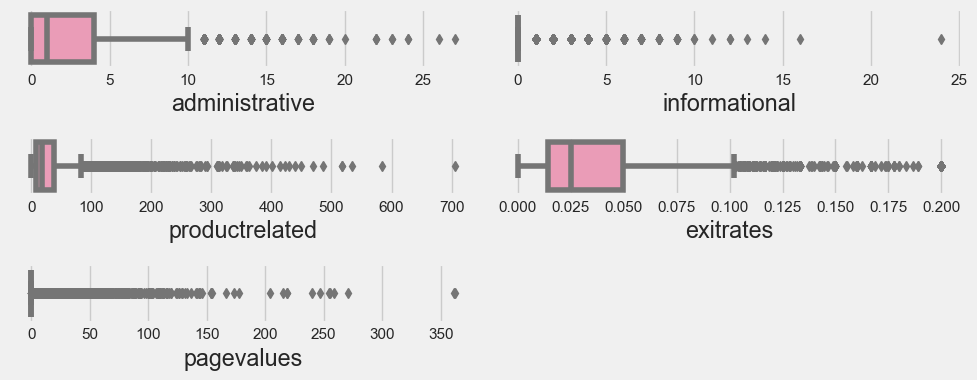

In [21]:
# defining function to check boxplot of the data 

def plot_outliner(data):
    plt.figure(figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)
    for i in range(0, len(numerical_feature)):
        plt.subplot(12, 2, i+1)
        sns.boxplot(x=data[numerical_feature[i]], color='#f78fb3')
        plt.xlabel(numerical_feature[i])
    plt.tight_layout()

plot_outliner(x_train)

All features in `x_train` that are numerical type, have outliers

In [22]:
outlier_features = numerical_feature

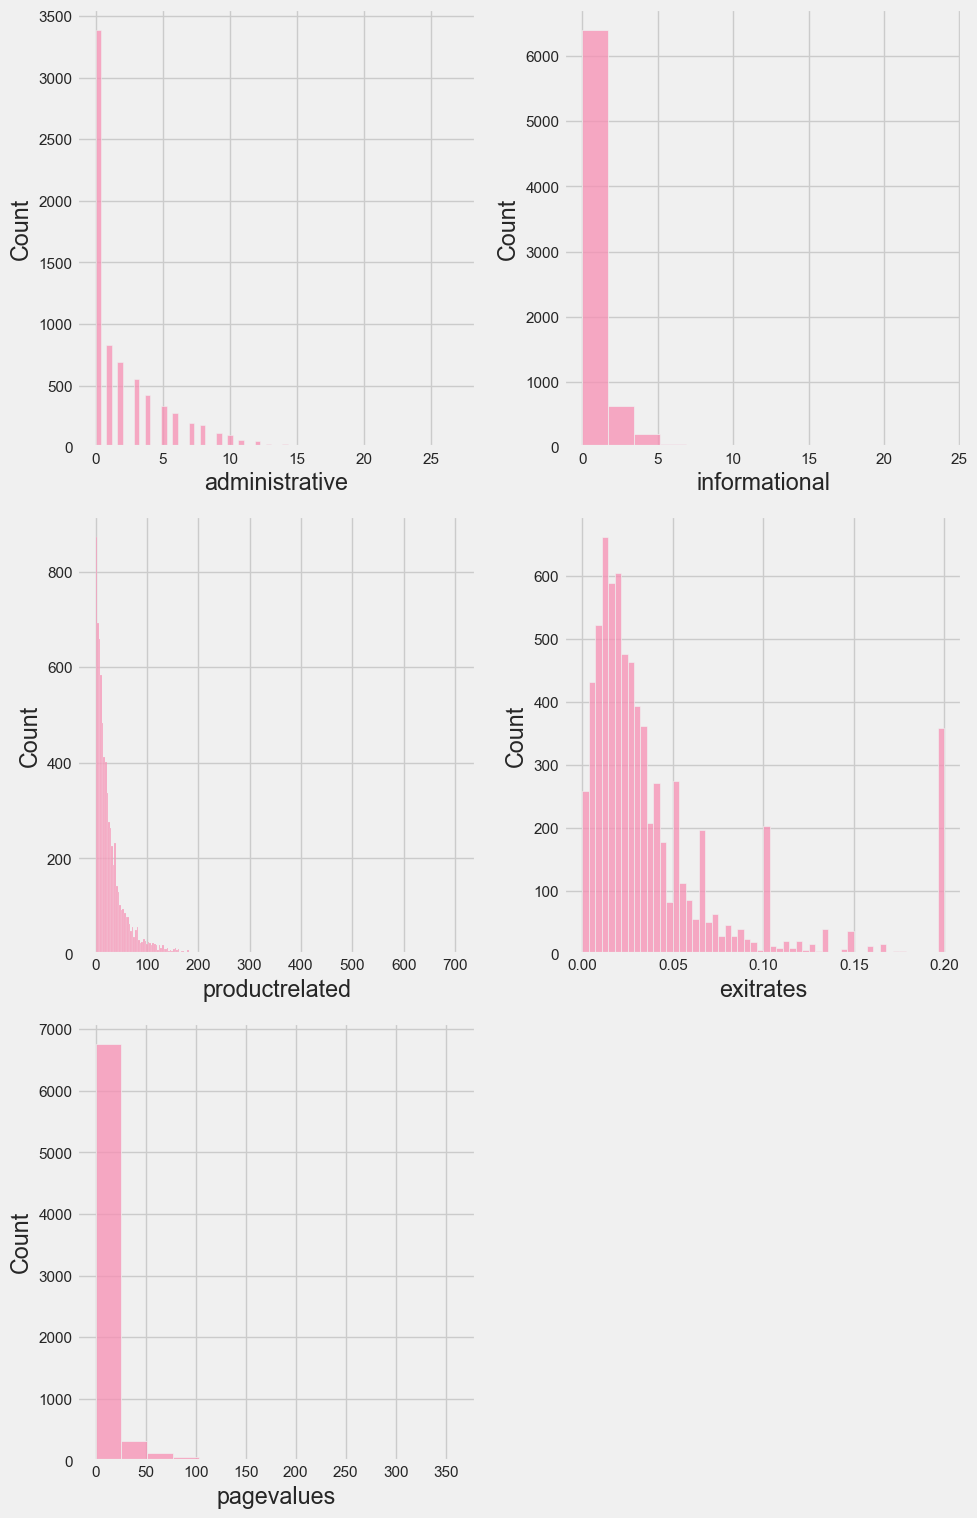

In [23]:
#Distribution
def plot_distribution(data):
    plt.figure(figsize=(10, 20))
    features = outlier_features
    for i in range(0, len(features)):
        plt.subplot(4, 2, i+1)
        sns.histplot(x=data[features[i]], color='#f78fb3')
        plt.xlabel(features[i])

    plt.tight_layout()

plot_distribution(x_train)

In [24]:
# define function to handle outlier by replacing outlier value to its relative features median
import numpy as np

def outlier_handler(data, feature):
    for f in feature:
        q1  = data[f].quantile(0.25)
        q3  = data[f].quantile(0.75)
        iqr = q3 - q1
        
        lower_tail = q1 - 1.5 *iqr
        upper_tail = q3 + 1.5 *iqr
        median     = np.median(data[f])
        for i in data[f]:
            if i > upper_tail or i < lower_tail:
                data[f] = data[f].replace(i,median)
                
outlier_handler(x_train, outlier_features)

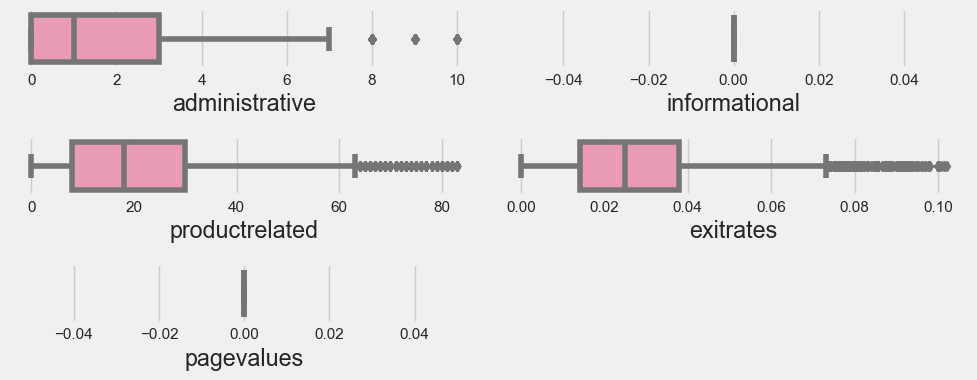

In [25]:
# checking the results
plot_outliner(x_train)

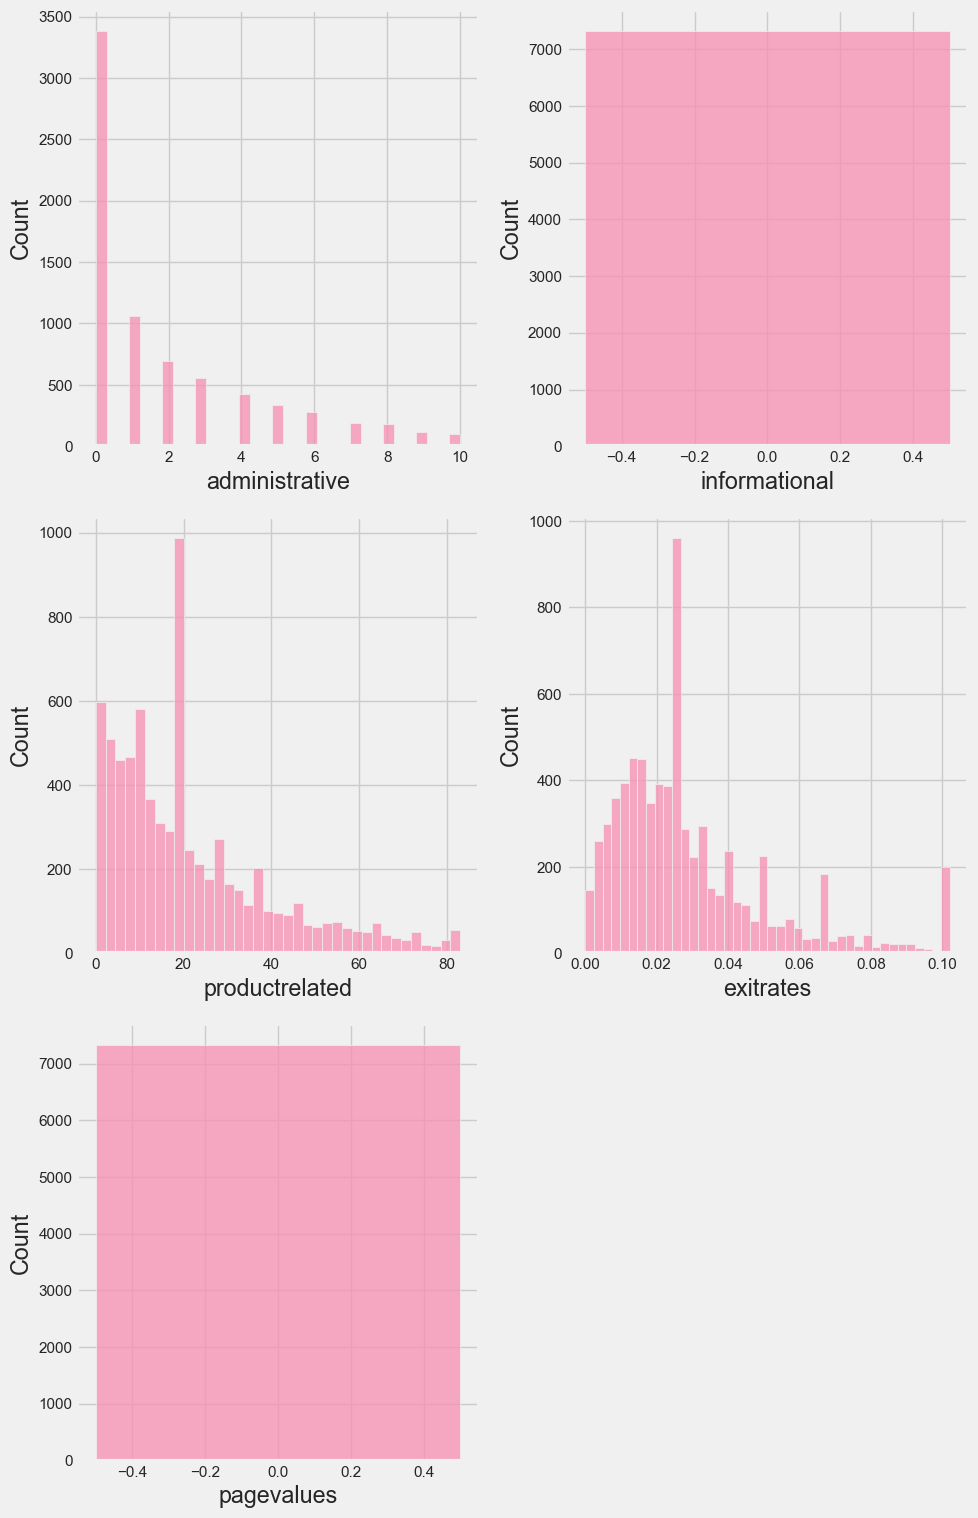

In [26]:
plot_distribution(x_train)

In [48]:
x_train['pagevalues'].value_counts()

pagevalues
0.0    7327
Name: count, dtype: int64

### Feature Transformation

In [27]:
# numerical type feature to transform
numerical_feature

['administrative',
 'informational',
 'productrelated',
 'exitrates',
 'pagevalues']

In [28]:
# Standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for n in numerical_feature:
    scaler = ss.fit(x_train[[n]])
    x_train[n] = scaler.transform(x_train[[n]])
    x_test[n] = scaler.transform(x_test[[n]])

### Feature Encoding

In [29]:
# label encoding on visitortype
column_encode = ['visitortype']

def label_category(data, column):
    for i in column:
        data[i] = data[i].astype('category').cat.codes

In [30]:
label_category(x_train,column_encode)

In [31]:
label_category(x_test,column_encode)

In [32]:
x_train['visitortype'].value_counts()

visitortype
2    6314
0     962
1      51
Name: count, dtype: int64

In [33]:
x_test['visitortype'].value_counts()

visitortype
2    2655
0     470
1      16
Name: count, dtype: int64

### Class imbalances

In [34]:
from imblearn import under_sampling, over_sampling

x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(x_train, y_train)

In [45]:
y_train.value_counts()

revenue
0    6169
1    1158
Name: count, dtype: int64

In [44]:
len(x_train)

7327

In [46]:
y_over_SMOTE.value_counts()

revenue
0    6169
1    6169
Name: count, dtype: int64

In [47]:
len(x_over_SMOTE)

12338